In [1]:
# 模型训练
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
base_path = 'E:\stock'
company_info = pd.read_csv(os.path.join(base_path, 'company_info.csv'))

In [3]:
company_info['industry'].unique()

array(['银行', '全国地产', '互联网', '环境保护', '区域地产', '酒店餐饮', '运输设备', '综合类', '建筑工程',
       '玻璃', '家用电器', '文教休闲', '其他商业', '元器件', 'IT设备', '其他建材', '汽车服务',
       '火力发电', '医药商业', '汽车配件', '广告包装', '轻工机械', '新型电力', '多元金融', '饲料',
       '电气设备', '房产服务', '石油加工', '铅锌', '农业综合', '批发业', '通信设备', '旅游景点', '港口',
       '机场', '石油贸易', '空运', '医疗保健', '商贸代理', '化学制药', '影视音像', '工程机械', '纺织',
       '证券', '化纤', '水泥', '生物制药', '专用机械', '供气供热', '农药化肥', '机床制造', '百货',
       '中成药', '路桥', '造纸', '食品', '黄金', '化工原料', '矿物制品', '水运', '日用化工',
       '机械基件', '汽车整车', '煤炭开采', '软件服务', '铁路', '染料涂料', '白酒', '林业', '水务',
       '水力发电', '旅游服务', '铝', '保险', '园区开发', '小金属', '铜', '普钢', '航空', '特种钢',
       '种植业', '出版业', '焦炭加工', '啤酒', '公路', '超市连锁', '钢加工', '渔业', '农用机械',
       '软饮料', '化工机械', '塑料', '红黄酒', '橡胶', '家居用品', '摩托车', '仓储物流', '电器仪表',
       '服饰', '纺织机械', '电器连锁', '装修装饰', '半导体', '电信运营', '石油开采', '乳制品', '商品城',
       '公共交通', '陶瓷', '船舶', nan], dtype=object)

In [4]:
need_industry = ['互联网', '环境保护', '运输设备', '综合类',
       '家用电器',  '元器件', 'IT设备', '其他建材', '汽车服务',
       '医药商业', '汽车配件', '轻工机械', '新型电力', '多元金融', 
       '电气设备', '铅锌', '农业综合', '通信设备', 
       '机场', '空运', '医疗保健', '化学制药', '工程机械',
       '证券', '水泥', '生物制药', '专用机械', '供气供热', '机床制造', 
       '中成药', '路桥', '造纸', '食品', '黄金', '化工原料', '矿物制品', '水运', '日用化工',
       '汽车整车', '软件服务', '白酒', '铝', '小金属', '铜', '航空', '啤酒', '公路', '渔业', '农用机械',
        '化工机械', '红黄酒',  '家居用品', '摩托车', '电器仪表',
       '电器连锁', '半导体', '电信运营', '乳制品', '商品城', '公共交通', '船舶']
company_info = company_info[company_info['industry'].isin(need_industry)]

In [5]:
ts_code_set = set(company_info['ts_code'].values)

In [6]:
company_info

,index,ts_code,symbol,name,area,industry,fullname,market,exchange,list_date,is_hs
2,2,000004.SZ,4,国华网安,深圳,互联网,深圳国华网安科技股份有限公司,主板,SZSE,19910114,N
3,3,000005.SZ,5,世纪星源,深圳,环境保护,深圳世纪星源股份有限公司,主板,SZSE,19901210,N
6,6,000008.SZ,8,神州高铁,北京,运输设备,神州高铁技术股份有限公司,主板,SZSE,19920507,S
7,7,000009.SZ,9,中国宝安,深圳,综合类,中国宝安集团股份有限公司,主板,SZSE,19910625,S
12,12,000016.SZ,16,深康佳A,深圳,家用电器,康佳集团股份有限公司,主板,SZSE,19920327,S
...,...,...,...,...,...,...,...,...,...,...,...
3014,3903,605369.SH,605369,拱东医疗,浙江,医疗保健,浙江拱东医疗器械股份有限公司,主板,SSE,20200916,N
3015,3904,605376.SH,605376,博迁新材,江苏,小金属,江苏博迁新材料股份有限公司,主板,SSE,20201208,N
3016,3905,605377.SH,605377,华旺科技,浙江,造纸,杭州华旺新材料科技股份有限公司,主板,SSE,20201228,N
3018,3907,605399.SH,605399,晨光新材,江西,化工原料,江西晨光新材料股份有限公司,主板,SSE,20200804,N


In [7]:
def get_limit():
    if os.path.exists('limit.csv'):
        return pd.read_csv('limit.csv')
    else:
        df_all = []
        for path in tqdm(os.listdir(os.path.join(base_path, 'DailyData2'))):
            tmp_df = pd.read_csv(os.path.join(base_path, 'DailyData2', path))
            tmp_df2 = pd.read_csv(os.path.join(base_path, 'LimitPrice', path))


            tmp_df = tmp_df.merge(tmp_df2[['trade_date', 'up_limit', 'down_limit']], on=['trade_date'], how='left')

            tmp_df['open_limit'] = tmp_df['open'] >= tmp_df['up_limit']
            tmp_df['close_limit'] = tmp_df['close'] >= tmp_df['up_limit']
            tmp_df['high_limit'] = tmp_df['high'] >= tmp_df['up_limit']

            df_all.append(tmp_df)
        df_all = pd.concat(df_all)
        df_all = df_all.reset_index(drop=True)
        df_all = df_all[['trade_date', 'ts_code', 'open', 'high', 'low', 'close', 'pre_close',
                    'up_limit', 'down_limit', 'open_limit', 'close_limit', 'high_limit']]
        df_all.to_csv('limit.csv', index=None)
        limit_info = df_all.copy()
    return limit_info
limit_info = get_limit()

In [8]:
def get_daily(update=True):
    if os.path.exists('dailybasic.csv') and not update:
        return pd.read_csv('dailybasic.csv')
    else:    
        df_all = []
        for path in tqdm(os.listdir(os.path.join(base_path, 'DailyBasic'))):
            tmp_df = pd.read_csv(os.path.join(base_path, 'DailyBasic', path))
            tmp_df['turnover_rate_f_mean_5'] = tmp_df['turnover_rate_f'].rolling(5).mean()
            tmp_df['turnover_rate_f_mean_10'] = tmp_df['turnover_rate_f'].rolling(10).mean()
            df_all.append(tmp_df)
        df_all = pd.concat(df_all)
        df_all = df_all.reset_index(drop=True)
        df_all = df_all[['ts_code', 'trade_date', 'turnover_rate_f', 'total_mv', 'pe', 'turnover_rate_f_mean_10']]
        df_all.dropna(inplace=True)
        df_all.to_csv('dailybasic.csv', index=None)
        dailybasic = df_all.copy()
        return dailybasic
dailybasic = get_daily(update=False)

In [9]:
index = pd.read_csv(os.path.join('E:\stock\IndexData', '000001.SH.csv'))
index['amount_5'] = index['amount'].rolling(5).mean()
index['close_5'] = index['close'].shift(5) / index['close'] - 1
index['close_10'] = index['close'].shift(5) / index['close'] - 1
index['close_rate'] = index['close'] / index['pre_close'] - 1

In [10]:
df_all = []
for path in tqdm(os.listdir(os.path.join(base_path, 'DailyData'))):
    tmp_df = pd.read_csv(os.path.join(base_path, 'DailyData', path))
    tmp_df['close_shift_5'] = tmp_df['close'].shift(5)
    tmp_df['close_shift_10'] = tmp_df['close'].shift(10)
    tmp_df['close_shift_20'] = tmp_df['close'].shift(20)
    tmp_df['amount_sum_5'] = tmp_df['amount'].rolling(5).mean()
    tmp_df['close_t'] = tmp_df['close'] / tmp_df['pre_close'] - 1
    df_all.append(tmp_df)
df_all = pd.concat(df_all)
df_all = df_all.reset_index(drop=True)
df_all.dropna(inplace=True)

100%|██████████| 3017/3017 [00:22<00:00, 132.76it/s]


In [11]:
df_all = df_all.merge(limit_info[['trade_date', 'ts_code', 'open_limit', 'close_limit', 'high_limit']], on=['trade_date', 'ts_code'],
            how='left')

df_all = df_all.merge(dailybasic, on=['trade_date', 'ts_code'], how='left')

df_all['close_shift_5'] = df_all['close'] / df_all['close_shift_5'] - 1
df_all['close_shift_10'] = df_all['close'] / df_all['close_shift_10'] - 1
df_all['close_shift_20'] = df_all['close'] / df_all['close_shift_20'] - 1


In [12]:
df_all = df_all.merge(index[['trade_date', 'amount_5', 'close_5', 'close_rate']], on=['trade_date'], how='left')
df_all = df_all[df_all['ts_code'].isin(ts_code_set)]

In [13]:
feature_col = [ 'turnover_rate_f_mean_10', 'turnover_rate_f', 'total_mv', 'pe', 'close_t',
               'close_shift_5', 'close_shift_10', 'close_shift_20']

In [14]:
for col in feature_col:
    df_all['rank_'+col] = df_all.groupby('trade_date')[col].rank(ascending=False)


In [15]:
df_all['final_score'] = df_all['rank_total_mv']*1 
df_all['rank_final'] = df_all.groupby('trade_date')['final_score'].rank(ascending=True)

In [16]:
tmp_df = df_all[(df_all['trade_date']>=20200101)]

In [17]:
day_num = 1
stock_num = tmp_df['ts_code'].nunique()
price = np.zeros((tmp_df['trade_date'].nunique()+1, stock_num))
ts_code_map = dict(zip(tmp_df['ts_code'].unique(), range(stock_num)))
pos = np.zeros((tmp_df['trade_date'].nunique()+1, stock_num))
factor = 'rank_' + 'final'
top_num = 10

for i, g in tmp_df.groupby('trade_date'):
    ts_code = g['ts_code'].values
    p = g['close'].values
    close_limit = g['close_limit'].values
    for j in range(len(ts_code)):
        price[day_num, ts_code_map[ts_code[j]]] = p[j]
    
    g = g.sort_values(factor).reset_index(drop=True)#.loc[:top_num]
    ts_code = g['ts_code'].values
    limit = g['close_limit'].values
    f1 = g['close_t'].values
    f2 = g['close_shift_5'].values
    tmp_num = 0
    for j in range(len(g)):
        if (pos[day_num-1, ts_code_map[ts_code[j]]] == 1 or limit[j] == False) and f1[j]>-0.05 and f2[j]>0:
            pos[day_num, ts_code_map[ts_code[j]]] = 1
            tmp_num += 1
            
        if tmp_num >= top_num:
            break
        
    day_num += 1
price[0, :] = price[1, :]
turnover = np.abs(pos[1:, :] - pos[:-1, :])
pnl = (price[1:, :] / price[:-1, :] - 1) * pos[:-1, :]
netpnl = pnl - turnover * 0.0003

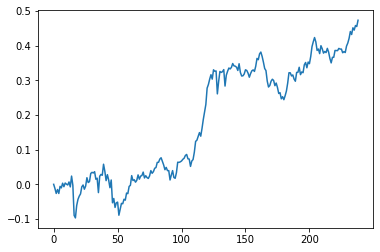

0.4729884420340499


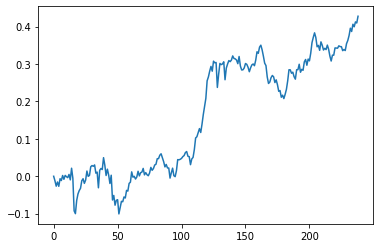

0.42786844203404983


In [18]:
arr = np.nansum(pnl, axis=1)
plt.plot(np.cumsum(arr)/top_num)
plt.show()
print(np.sum(arr) / top_num)

arr = np.nansum(netpnl, axis=1)
plt.plot(np.cumsum(arr)/top_num)
plt.show()
print(np.sum(arr) / top_num)

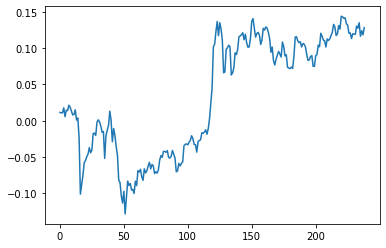

0.1282752469510342


In [19]:
arr = index[index['trade_date']>=20200101]['close_rate'].values
plt.plot(np.cumsum(arr))
plt.show()
print(np.sum(arr))